<a href="https://colab.research.google.com/github/VitorSRamos/CNN-MorfGal/blob/main/perceptron/final_perceptron.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Versão do estudo do perceptron para a reunião de 17/11/2021

Uma variação da versão anterior incluindo o ajuste do Bias e procura por condições iniciais ideais

In [ ]:
import numpy as np 
a = 1

# Perceptron
O output de um perceptron com função de ativação tangente hiperbólica é $\frac{1 + \tanh[a(w_1 x_j + w_2 y_j + b)]}{2}$ onde $a$ é um parâmetro livre e $b$ é o bias. A função erro $\lambda_j$ de um caso individual é dada por $\frac{1 + \tanh[a(w_1 x_j + w_2 y_j + b)]}{2} - l_j$, $l_j$ sendo o output esperado. Assim, a função erro total é:
\begin{equation}
    \epsilon_2 = \sum_{j=1}^{4} {\lambda_j}^2
\end{equation}
e $j$ representa os 4 pares de inputs: (0,0), (1,0), (0,1), (1,1).

Derivadas parciais:
\begin{equation}
    \frac{\partial \epsilon_2}{\partial w_1} = \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{w_1}
\end{equation}
Onde ${\lambda_j}_{w_1}$ representa a derivada de $\lambda_j$ em relação a $w_1$.
\begin{equation}
    \frac{\partial \epsilon_2}{\partial w_2} = \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{w_2}
\end{equation}

\begin{equation}
    \frac{\partial \epsilon_2}{\partial b} = \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{b}
\end{equation}

Derivadas segundas:

\begin{equation}
    \frac{\partial^2 \epsilon_2}{\partial w_1^2} = \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1}^2 + \lambda_j {\lambda_j}_{w_1 w_1})
\end{equation}

\begin{equation}
    \frac{\partial^2 \epsilon_2}{\partial w_2^2} = \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2}^2 + \lambda_j {\lambda_j}_{w_2 w_2})
\end{equation}

\begin{equation}
    \frac{\partial^2 \epsilon_2}{\partial b^2} = \sum_{j=1}^{4} 2 ({\lambda_j}_{b}^2 + \lambda_j {\lambda_j}_{b b })
\end{equation}

Sabendo que ${\lambda_j}_{w_1 w_2} = {\lambda_j}_{w_2 w_1}$ (válido também para outros casos):

\begin{equation}
    \frac{\partial^2 \epsilon_2}{\partial w_1 \partial w_2} = \frac{\partial^2 \epsilon_2}{\partial w_2 \partial w_1} = \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{w_2} + \lambda_j {\lambda_j}_{w_2 w_1})
\end{equation}

\begin{equation}
    \frac{\partial^2 \epsilon_2}{\partial w_1 \partial b} = \frac{\partial^2 \epsilon_2}{\partial b \partial w_1} = \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_1})
\end{equation}

\begin{equation}
    \frac{\partial^2 \epsilon_2}{\partial w_2 \partial b} = \frac{\partial^2 \epsilon_2}{\partial b \partial w_2} = \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_2})
\end{equation}




A matriz fica:


\begin{equation}
    \begin{bmatrix}
        \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1}^2 + \lambda_j {\lambda_j}_{w_1 w_1}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{w_2} + \lambda_j {\lambda_j}_{w_2 w_1}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_1}) \\
        \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{w_1} + \lambda_j {\lambda_j}_{w_1 w_2}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2}^2 + \lambda_j {\lambda_j}_{w_2 w_2}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{w_1} + \lambda_j {\lambda_j}_{w_1 w_2}) \\
\sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_1}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_2}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{b}^2 + \lambda_j {\lambda_j}_{b b })
    \end{bmatrix}  
    \begin{bmatrix}
        \delta_1 \\
        \delta_2 \\
        \delta_b
    \end{bmatrix} =
    \begin{bmatrix}
        - \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{w_1} \\
        - \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{w_2} \\
        - \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{b}
    \end{bmatrix}
\end{equation}

# Avaliando $\lambda$
Definindo $S_j = w_1 x_j + w_2 y_j + b$, temos $\lambda_j = \frac{1 + \tanh(a S_j)}{2} - l_j$. Temos então:


In [ ]:
def lj(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w1
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return ( (1 + np.tanh(a * Sj)) / 2) - lj


\begin{equation}
    {\lambda_j}_{w_1} = \frac{a}{2}[1 - \tanh^2(a S_j)] x_j
\end{equation}

In [ ]:
def lj_w1(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w1
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return (a/2) * x * (1 - np.tanh(a * Sj)**2)

#sum_w1 = lj_w1(inputs[0]) + lj_w1(inputs[1]) + lj_w1(inputs[2]) + lj_w1(inputs[3])

\begin{equation}
    {\lambda_j}_{w_2} = \frac{a}{2} [1 - \tanh^2(a S_j)] y_j
\end{equation}

In [ ]:
def lj_w2(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w2
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return (a/2) * y * (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{b} = \frac{a}{2} [1 - \tanh^2(a S_j)]
\end{equation}

In [ ]:
def lj_b(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_b
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return (a/2) *  (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{w_1 w_1} = - a^2 x_j^2 \tanh(a S_j)[1 - \tanh^2(a S_j)]
\end{equation}

In [ ]:
def lj_w1w1(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w1w1
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return -(a**2) * (x**2) * np.tanh( a * Sj) * (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{w_2 w_2} = - a^2 y_j^2 \tanh(a S_j)[1 - \tanh^2(a S_j)]
\end{equation}

In [ ]:
def lj_w2w2(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w1w1
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return -1 * (a**2) * (y)**2 * np.tanh( a * Sj) * (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{b b} = - a^2 \tanh(a S_j)[1 - \tanh^2(a S_j)]
\end{equation}

In [ ]:
def lj_bb(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_bb
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return -1 * (a**2) *  np.tanh( a * Sj) * (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{w_1 w_2} = - a^2 x_j y_j \tanh(a S_j)[1 - \tanh^2(a S_j)] = {\lambda_j}_{w_2 w_1}
\end{equation}

In [ ]:
def lj_w1w2(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w1w2
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return -1 * (a**2) * (x*y) * np.tanh( a * Sj) * (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{w_1 b} = - a^2 x_j \tanh(a S_j)[1 - \tanh^2(a S_j)] = {\lambda_j}_{b w_1}
\end{equation}

In [ ]:
def lj_w1b(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w1b
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return -1 * (a**2) * x * np.tanh( a * Sj) * (1 - np.tanh(a * Sj)**2)

\begin{equation}
    {\lambda_j}_{w_2 b} = - a^2 y_j \tanh(a S_j)[1 - \tanh^2(a S_j)] = {\lambda_j}_{b w_2}
\end{equation}

In [ ]:
def lj_w2b(inputs, pesos): # Toma um input na forma [x, y, l] e retorna lambda_j_w2b
    x = inputs[0]
    y = inputs[1]
    lj = inputs[2]
    Sj = pesos[0] * x + pesos[1] * y + pesos[2]

    return -1 * (a**2) * y * np.tanh( a * Sj) * (1 - np.tanh(a * Sj)**2)

# Montando a matriz

A matriz $H D = A$ fica:

\begin{equation}
    \begin{bmatrix}
        \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1}^2 + \lambda_j {\lambda_j}_{w_1 w_1}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{w_2} + \lambda_j {\lambda_j}_{w_2 w_1}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_1}) \\
        \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{w_1} + \lambda_j {\lambda_j}_{w_1 w_2}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2}^2 + \lambda_j {\lambda_j}_{w_2 w_2}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_2}) \\
\sum_{j=1}^{4} 2 ({\lambda_j}_{w_1} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_1}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{w_2} {\lambda_j}_{b} + \lambda_j {\lambda_j}_{b w_2}) & \sum_{j=1}^{4} 2 ({\lambda_j}_{b}^2 + \lambda_j {\lambda_j}_{b b })
    \end{bmatrix}  
    \begin{bmatrix}
        \delta_1 \\
        \delta_2 \\
        \delta_b
    \end{bmatrix} =
    \begin{bmatrix}
        - \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{w_1} \\
        - \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{w_2} \\
        - \sum_{j=1}^{4} 2 \lambda_j {\lambda_j}_{b}
    \end{bmatrix}
\end{equation}

In [ ]:
def make_H(casos, pesos): # gera a matriz hessiana a partir de uma lista de 4 inputs
    H11 = 2 * ( lj_w1(casos[0], pesos)**2 + lj(casos[0], pesos) * lj_w1w1(casos[0], pesos) ) + 2 * ( lj_w1(casos[1], pesos)**2 + lj(casos[1], pesos) * lj_w1w1(casos[1], pesos) ) + 2 * ( lj_w1(casos[2], pesos)**2 + lj(casos[2], pesos) * lj_w1w1(casos[2], pesos) ) + 2 * ( lj_w1(casos[3], pesos)**2 + lj(casos[3], pesos) * lj_w1w1(casos[3], pesos) )

    H12 = 2 * ( lj_w1(casos[0], pesos) * lj_w2(casos[0], pesos) + lj(casos[0], pesos) * lj_w1w2(casos[0], pesos) ) + 2 * ( lj_w1(casos[1], pesos) * lj_w2(casos[1], pesos) + lj(casos[1], pesos) * lj_w1w2(casos[1], pesos) ) + 2 * ( lj_w1(casos[2], pesos) * lj_w2(casos[2], pesos) + lj(casos[2], pesos) * lj_w1w2(casos[2], pesos) ) + 2 * ( lj_w1(casos[3], pesos) * lj_w2(casos[3], pesos) + lj(casos[3], pesos) * lj_w1w2(casos[3], pesos) )

    H13 = 2 * ( lj_w1(casos[0], pesos) * lj_b(casos[0], pesos) + lj(casos[0], pesos) * lj_w1b(casos[0], pesos) ) +  2 * ( lj_w1(casos[1], pesos) * lj_b(casos[1], pesos) + lj(casos[1], pesos) * lj_w1b(casos[1], pesos) ) +  2 * ( lj_w1(casos[2], pesos) * lj_b(casos[2], pesos) + lj(casos[2], pesos) * lj_w1b(casos[2], pesos) ) +  2 * ( lj_w1(casos[3], pesos) * lj_b(casos[3], pesos) + lj(casos[3], pesos) * lj_w1b(casos[3], pesos) ) 
    
    # OBS: H12 = H21
    H21 = 2 * ( lj_w1(casos[0], pesos) * lj_w2(casos[0], pesos) + lj(casos[0], pesos) * lj_w1w2(casos[0], pesos) ) + 2 * ( lj_w1(casos[1], pesos) * lj_w2(casos[1], pesos) + lj(casos[1], pesos) * lj_w1w2(casos[1], pesos) ) + 2 * ( lj_w1(casos[2], pesos) * lj_w2(casos[2], pesos) + lj(casos[2], pesos) * lj_w1w2(casos[2], pesos) ) + 2 * ( lj_w1(casos[3], pesos) * lj_w2(casos[3], pesos) + lj(casos[3], pesos) * lj_w1w2(casos[3], pesos) )

    H22 = 2 * ( lj_w2(casos[0], pesos)**2 + lj(casos[0], pesos) * lj_w2w2(casos[0], pesos) ) + 2 * ( lj_w2(casos[1], pesos)**2 + lj(casos[1], pesos) * lj_w2w2(casos[1], pesos) ) + 2 * ( lj_w2(casos[2], pesos)**2 + lj(casos[2], pesos) * lj_w2w2(casos[2], pesos) ) + 2 * ( lj_w2(casos[3], pesos)**2 + lj(casos[3], pesos) * lj_w2w2(casos[3], pesos) )

    H23 = 2 * ( lj_w2(casos[0], pesos) * lj_b(casos[0], pesos) + lj(casos[0], pesos) * lj_w2b(casos[0], pesos) ) + 2 * ( lj_w2(casos[1], pesos) * lj_b(casos[1], pesos) + lj(casos[1], pesos) * lj_w2b(casos[1], pesos) ) + 2 * ( lj_w2(casos[2], pesos) * lj_b(casos[2], pesos) + lj(casos[2], pesos) * lj_w2b(casos[2], pesos) ) + 2 * ( lj_w2(casos[3], pesos) * lj_b(casos[3], pesos) + lj(casos[3], pesos) * lj_w2b(casos[3], pesos) )

    # OBS: H31 = H13 e H32 = H23

    H31 = 2 * ( lj_w1(casos[0], pesos) * lj_b(casos[0], pesos) + lj(casos[0], pesos) * lj_w1b(casos[0], pesos) ) +  2 * ( lj_w1(casos[1], pesos) * lj_b(casos[1], pesos) + lj(casos[1], pesos) * lj_w1b(casos[1], pesos) ) +  2 * ( lj_w1(casos[2], pesos) * lj_b(casos[2], pesos) + lj(casos[2], pesos) * lj_w1b(casos[2], pesos) ) +  2 * ( lj_w1(casos[3], pesos) * lj_b(casos[3], pesos) + lj(casos[3], pesos) * lj_w1b(casos[3], pesos) ) 

    H32 = 2 * ( lj_w2(casos[0], pesos) * lj_b(casos[0], pesos) + lj(casos[0], pesos) * lj_w2b(casos[0], pesos) ) + 2 * ( lj_w2(casos[1], pesos) * lj_b(casos[1], pesos) + lj(casos[1], pesos) * lj_w2b(casos[1], pesos) ) + 2 * ( lj_w2(casos[2], pesos) * lj_b(casos[2], pesos) + lj(casos[2], pesos) * lj_w2b(casos[2], pesos) ) + 2 * ( lj_w2(casos[3], pesos) * lj_b(casos[3], pesos) + lj(casos[3], pesos) * lj_w2b(casos[3], pesos) )

    H33 = 2 * ( lj_b(casos[0], pesos)**2 + lj(casos[0], pesos) * lj_bb(casos[0], pesos) ) + 2 * ( lj_b(casos[1], pesos)**2 + lj(casos[1], pesos) * lj_bb(casos[1], pesos) ) + 2 * ( lj_b(casos[2], pesos)**2 + lj(casos[2], pesos) * lj_bb(casos[2], pesos) ) + 2 * ( lj_b(casos[3], pesos)**2 + lj(casos[3], pesos) * lj_bb(casos[3], pesos) ) 

    H = np.array([[H11, H12, H13], [H21, H22, H23], [H31, H32, H33]])

    return H

#print(make_H(casos))

In [ ]:
def make_A(casos, pesos):
    A11 = - 2 * lj(casos[0], pesos) * lj_w1(casos[0], pesos) - 2 * lj(casos[1], pesos) * lj_w1(casos[1], pesos) - 2 * lj(casos[2], pesos) * lj_w1(casos[2], pesos) - 2 * lj(casos[3], pesos) * lj_w1(casos[3], pesos) 
    
    A21 = - 2 * lj(casos[0], pesos) * lj_w2(casos[0], pesos) - 2 * lj(casos[1], pesos) * lj_w2(casos[1], pesos) - 2 * lj(casos[2], pesos) * lj_w2(casos[2], pesos) - 2 * lj(casos[3], pesos) * lj_w2(casos[3], pesos) # OBS HAVIA UM ERRO NESTE CASO, primeiro termo não tinha sinal negativo

    A31 = - 2 * lj(casos[0], pesos) * lj_b(casos[0], pesos) - 2 * lj(casos[1], pesos) * lj_b(casos[1], pesos) - 2 * lj(casos[2], pesos) * lj_b(casos[2], pesos) - 2 * lj(casos[3], pesos) * lj_b(casos[3], pesos)

    A = np.array([[A11], [A21], [A31]])

    return A

#print(make_A(casos))

In [ ]:
def make_D(H, A):
    # Gerando matriz inversa
    H_inv = np.linalg.inv(H)

    # Conferindo
    #print('H H^-1:')
    #print(np.matmul(H, H_inv))

    # Aplicando:
    D = np.matmul(H_inv, A)

    return D

#print(make_D(make_H(casos), make_A(casos)))

In [ ]:
# Imports e definições
import matplotlib.pyplot as plt

def perceptron(input1, input2, pesos):
    perc =  ( 1 + np.tanh( a * (input1 * pesos[0] + input2 * pesos[1] + pesos[2]) ) )/2
    return perc

def error_func(input1, input2, pesos, label):
    #lj2 = (  (( 1 + np.tanh( input1 * weights[0] + input2 * weights[1] ) )/2) - label )**2
    lj2 = perceptron(input1, input2, pesos) - label
    return lj2

# Subrotina de otimização

In [ ]:
def weight_optimize(weights, verbose=False):
    
    # Rotina de otimização de pesos e bias através de inversão de matriz
    # Adicionei verbose, parada por counter e try na inversão de matriz
    
    counter = 0

    while True:
        if verbose==True:
            print('\n----------------- Iteração {} -----------------'.format(counter))
            # print dos pesos usados nessa iteração
            print('Lista de pesos: {}'.format(weights))

        # Cálculo do valor da função erro para minimização
        
        quad_error = lj(casos[0], weights)**2 + lj(casos[1], weights)**2 + lj(casos[2], weights)**2 + lj(casos[3], weights)**2
        if verbose==True:
            print('Erro quadrático: {}'.format(quad_error))

        H = make_H(casos, weights) # gero as matrizes para o conjunto atual de pesos
        A = make_A(casos, weights) 
        
        # Condicional para evitar erro de matriz não inversível
        try:
            D = make_D(H, A) # Calculo os deltas para este caso
            if verbose==True:
                print('Matriz dos deltas:')
                print(D)
        except np.linalg.LinAlgError:           
            print('\nMatriz não inversível')
            print('Pesos finais: {}'.format(weights))
            print('Erro quadrático final: {}'.format(new_quad_error))
            break

        # Atualizando pesos
        weights = [weights[0] + D[0][0], weights[1] + D[1][0], weights[2] + D[2][0] ]
        
        # Calculando novo erro:
        new_quad_error = lj(casos[0], weights)**2 + lj(casos[1], weights)**2 + lj(casos[2], weights)**2 + lj(casos[3], weights)**2

        counter += 1

        if new_quad_error <0.001 or counter > 50:
            print('\nPesos finais: {}'.format(weights))
            print('Erro quadrático final: {}'.format(new_quad_error))
            break
    return [new_quad_error, weights]

In [ ]:
def run_optimizer(casos):

    # gera pesos iniciais aleatórios e roda o otimizador de pesos
    
    weights = [np.random.uniform(0, 5), np.random.uniform(0, 5), np.random.uniform(-5, 5)] # pesos aleatórios
    initial_weights = [weights[0], weights[1], weights[2]]
    return weight_optimize(weights), initial_weights

In [ ]:
def iw_finder(n, casos):
    
    # roda o otimizador com n conjuntos de pesos iniciais e retorna o que encontra o menor erro quadrático
    
    iw_search = []

    for _ in range(n): # gero 5 casos e armazeno erro quad, pesos finais e pesos iniciais
        iw_search.append(run_optimizer(casos))

    iw_errors = [item[0][0] for item in iw_search] # gero listas com os erros quadráticos

    #print(iw_search)
    #print(iw_errors)

    min_index = iw_errors.index(min(iw_errors)) # acho índice do mínimo da lista de erros

    print('\n\nPesos Iniciais: {}'.format(iw_search[min_index][1]))
    print('Pesos Finais: {}'.format(iw_search[min_index][0][1]))
    print('Erro Final: {}'.format(iw_search[min_index][0][0]))

    return iw_search[min_index][1] # retorna os pesos iniciais que resultaram no menor erro

# Caso And

In [ ]:
casos = [ [0,0,0], [1,0,0], [0,1,0], [1,1,1] ]

ideal_iw = iw_finder(5, casos)


Matriz não inversível
Pesos finais: [0.03296833848245555, 0.5131783319807438, 18.948907063081847]
Erro quadrático final: 3.0

Pesos finais: [4.818220812751872, 14.379746753690092, -17.251907256865806]
Erro quadrático final: 0.0004099451456807277

Matriz não inversível
Pesos finais: [30.09374722615092, 0.14085822271930257, -10.585386727610747]
Erro quadrático final: 1.0

Matriz não inversível
Pesos finais: [1.979095189562511, 0.22891045870457516, 17.39315520133186]
Erro quadrático final: 2.9999999999999973

Matriz não inversível
Pesos finais: [0.6326766834141222, 1.15602315551188, 17.957345781903694]
Erro quadrático final: 2.9999999999999996


Pesos Iniciais: [4.360352042504261, 1.3666766185150765, -4.042909392990152]
Pesos Finais: [4.818220812751872, 14.379746753690092, -17.251907256865806]
Erro Final: 0.0004099451456807277


In [ ]:
# Demonstração da optimização dos pesos iniciais ideais
error_and, optimized_iw = weight_optimize(ideal_iw, verbose=True)


----------------- Iteração 0 -----------------
Lista de pesos: [4.360352042504261, 1.3666766185150765, -4.042909392990152]
Erro quadrático: 0.4283196101827368
Matriz dos deltas:
[[  0.45786877]
 [ 13.01307014]
 [-13.20899786]]

Pesos finais: [4.818220812751872, 14.379746753690092, -17.251907256865806]
Erro quadrático final: 0.0004099451456807277


## Plot

In [ ]:
print(optimized_iw)

[4.818220812751872, 14.379746753690092, -17.251907256865806]


In [ ]:
# Gerando pontos
x1 = np.arange(0, 1, 0.1)
x2 = np.arange(0, 1, 0.1)

x1, x2 = np.meshgrid(x1, x2) # Gerando grid

X1 = x1.flatten() # transformando em lista única
X2 = x2.flatten()

In [ ]:
data_perceptron = []

for index in range(len(X1)):
    data_perceptron.append( perceptron(X1[index], X2[index], optimized_iw) )

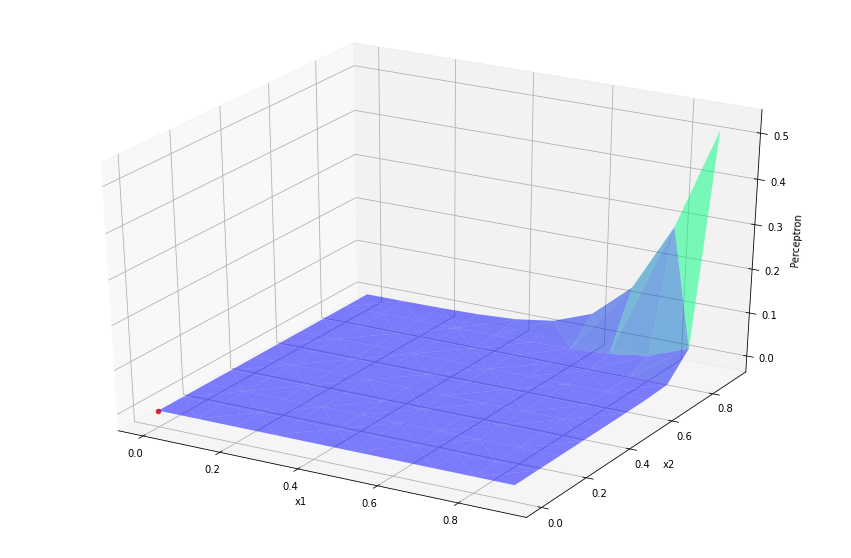

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.set_zlabel(r'Perceptron')
ax.plot_trisurf(X1, X2, data_perceptron, cmap='winter', alpha=0.5)
ax.scatter(0, 0, perceptron(0,0, optimized_iw), color = 'C3')

In [ ]:
weights_and = [optimized_iw[0], optimized_iw[1], optimized_iw[2]]
data_and = [perceptron(0,0, optimized_iw), perceptron(0,1, optimized_iw), perceptron(1,0, optimized_iw), perceptron(1,1, optimized_iw)]

print(weights_and)
print(data_and)

[4.818220812751872, 14.379746753690092, -17.251907256865806]
[1.0547118733938987e-15, 0.003190694093885338, 1.5857593016477267e-11, 0.9800058854439619]


# Caso Or

In [ ]:
casos = [ [0,0,0], [1,0,1], [0,1,1], [1,1,1] ]

ideal_iw = iw_finder(5, casos)


Matriz não inversível
Pesos finais: [32.24408733254172, 31.607919319497917, -50.88944300713966]
Erro quadrático final: 2.0

Matriz não inversível
Pesos finais: [1.0281854424265495, -7.348904841125614, 19.546947106104263]
Erro quadrático final: 1.0

Matriz não inversível
Pesos finais: [2.7653602888818227, -5.526568922324184, 19.104754663997387]
Erro quadrático final: 1.0

Pesos finais: [10.199436234998938, 4.245546370091459, -1.9804875965521298]
Erro quadrático final: 0.00046299495622612974

Pesos finais: [4.427292022716044, 5.481166811620412, -2.6333070820166946]
Erro quadrático final: 0.0007617403005343716


Pesos Iniciais: [2.7942891749736747, 3.491798678665626, -3.0901546184747453]
Pesos Finais: [10.199436234998938, 4.245546370091459, -1.9804875965521298]
Erro Final: 0.00046299495622612974


In [ ]:
# Demonstração da optimização dos pesos iniciais ideais
error_or, optimized_iw = weight_optimize(ideal_iw, verbose=True)


----------------- Iteração 0 -----------------
Lista de pesos: [2.7942891749736747, 3.491798678665626, -3.0901546184747453]
Erro quadrático: 0.5101172935320589
Matriz dos deltas:
[[ 4.45816773]
 [-2.34982856]
 [ 2.81586501]]

----------------- Iteração 1 -----------------
Lista de pesos: [7.2524569013792615, 1.1419701153750785, -0.2742896059055311]
Erro quadrático: 0.15656907140253587
Matriz dos deltas:
[[ 0.79567035]
 [ 0.87720199]
 [-0.55468182]]

----------------- Iteração 2 -----------------
Lista de pesos: [8.04812725136434, 2.019172109956698, -0.8289714244772393]
Erro quadrático: 0.032782879109213355
Matriz dos deltas:
[[ 0.57878133]
 [ 0.61534739]
 [-0.32897226]]

----------------- Iteração 3 -----------------
Lista de pesos: [8.626908585054636, 2.6345195044810987, -1.1579436854806868]
Erro quadrático: 0.010525805813361263
Matriz dos deltas:
[[ 0.5389103 ]
 [ 0.55901472]
 [-0.288925  ]]

----------------- Iteração 4 -----------------
Lista de pesos: [9.165818888941331, 3.193534

## Plot

In [ ]:
print(optimized_iw)

[10.199436234998938, 4.245546370091459, -1.9804875965521298]


In [ ]:
# Gerando pontos
x1 = np.arange(0, 1, 0.1)
x2 = np.arange(0, 1, 0.1)

x1, x2 = np.meshgrid(x1, x2) # Gerando grid

X1 = x1.flatten() # transformando em lista única
X2 = x2.flatten()

In [ ]:
data_perceptron = []

for index in range(len(X1)):
    data_perceptron.append( perceptron(X1[index], X2[index], optimized_iw) )

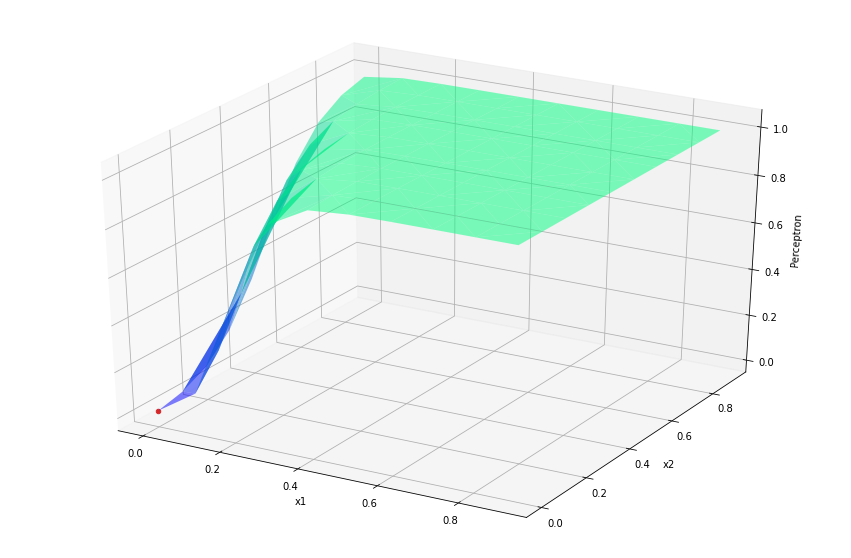

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.set_zlabel(r'Perceptron')
ax.plot_trisurf(X1, X2, data_perceptron, cmap='winter', alpha=0.5)
ax.scatter(0, 0, perceptron(0,0, optimized_iw), color = 'C3')

In [ ]:
weights_or = [optimized_iw[0], optimized_iw[1], optimized_iw[2]]
data_or = [perceptron(0,0, optimized_iw), perceptron(0,1, optimized_iw), perceptron(1,0, optimized_iw), perceptron(1,1, optimized_iw)]

print(weights_or)
print(data_or)

[10.199436234998938, 4.245546370091459, -1.9804875965521298]
[0.01868861714707315, 0.9893355475831631, 0.9999999273706952, 0.99999999998509]


# Caso Xor

In [ ]:
casos = [ [0,0,0], [1,0,1], [0,1,1], [1,1,0] ]

ideal_iw = iw_finder(15, casos)


Matriz não inversível
Pesos finais: [8.393084109399926, -6.100129189325155, 17.10746088415722]
Erro quadrático final: 1.9999999999999973

Matriz não inversível
Pesos finais: [9.91188788753093, -3.067729340877036, 12.356304070288628]
Erro quadrático final: 1.9999999999629763

Matriz não inversível
Pesos finais: [-5.366019173101255, 10.002998844633566, 14.67032328384461]
Erro quadrático final: 1.999999999999638

Matriz não inversível
Pesos finais: [9.316265357400825, -3.36974514471854, 13.470872115934444]
Erro quadrático final: 1.9999999999960154

Matriz não inversível
Pesos finais: [-3.966090027115272, 8.758463146149293, 14.665239436628024]
Erro quadrático final: 1.9999999999996345

Pesos finais: [29.808485829995682, 31.61240504158232, -13.578448538653898]
Erro quadrático final: 1.0

Pesos finais: [29.84792678664393, 29.313291035769893, -14.56308449024224]
Erro quadrático final: 1.0

Matriz não inversível
Pesos finais: [-2.101406961385222, 7.855320862392147, 13.533165265594109]
Erro qu

In [ ]:
# Demonstração da optimização dos pesos iniciais ideais
error_xor, optimized_iw = weight_optimize(ideal_iw, verbose=True)


----------------- Iteração 0 -----------------
Lista de pesos: [3.9458376290845547, 4.658963644789987, -0.5367566147322602]
Erro quadrático: 1.0648912612169918
Matriz dos deltas:
[[ 0.72283192]
 [ 1.82571984]
 [-0.40460108]]

----------------- Iteração 1 -----------------
Lista de pesos: [4.668669548700784, 6.484683488693009, -0.941357696203986]
Erro quadrático: 1.017444742432888
Matriz dos deltas:
[[ 0.5616474 ]
 [ 0.08394961]
 [-0.31176576]]

----------------- Iteração 2 -----------------
Lista de pesos: [5.23031695304606, 6.568633093871933, -1.253123452792904]
Erro quadrático: 1.0056885110922282
Matriz dos deltas:
[[ 0.53398337]
 [ 0.94558393]
 [-0.28189097]]

----------------- Iteração 3 -----------------
Lista de pesos: [5.76430032558857, 7.514217025102226, -1.5350144187633916]
Erro quadrático: 1.001967908153827
Matriz dos deltas:
[[ 0.51871509]
 [ 1.40987669]
 [-0.26782108]]

----------------- Iteração 4 -----------------
Lista de pesos: [6.283015410758917, 8.924093715325538, -1

## Plot

In [ ]:
print(optimized_iw)

[29.808485829995682, 31.61240504158232, -13.578448538653898]


In [ ]:
# Gerando pontos
x1 = np.arange(0, 1, 0.1)
x2 = np.arange(0, 1, 0.1)

x1, x2 = np.meshgrid(x1, x2) # Gerando grid

X1 = x1.flatten() # transformando em lista única
X2 = x2.flatten()

In [ ]:
data_perceptron = []

for index in range(len(X1)):
    data_perceptron.append( perceptron(X1[index], X2[index], optimized_iw) )

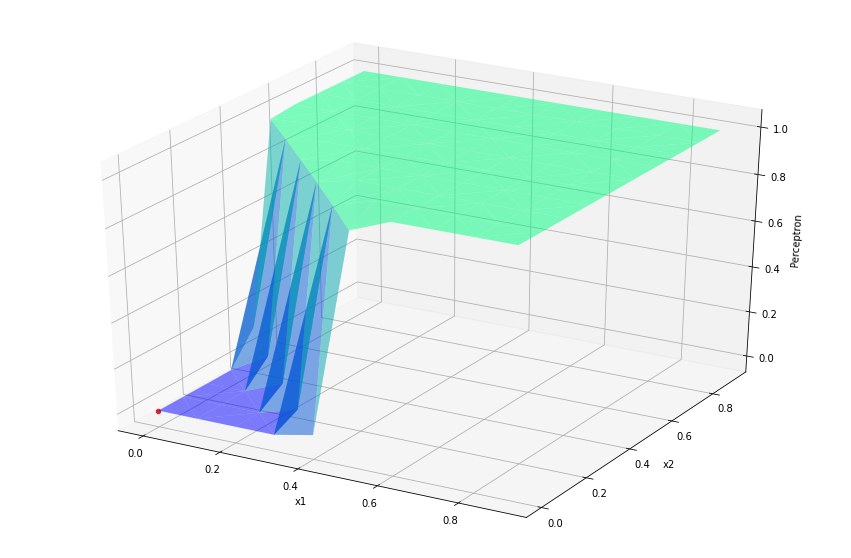

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.set_zlabel(r'Perceptron')
ax.plot_trisurf(X1, X2, data_perceptron, cmap='winter', alpha=0.5)
ax.scatter(0, 0, perceptron(0,0, optimized_iw), color = 'C3')

In [ ]:
weights_xor = [optimized_iw[0], optimized_iw[1], optimized_iw[2]]
data_xor = [perceptron(0,0, optimized_iw), perceptron(0,1, optimized_iw), perceptron(1,0, optimized_iw), perceptron(1,1, optimized_iw)]

print(weights_xor)
print(data_xor)

[29.808485829995682, 31.61240504158232, -13.578448538653898]
[1.606603738935064e-12, 0.9999999999999998, 0.999999999999992, 1.0]


# Tabela

In [ ]:
import pandas as pd

table = pd.DataFrame()

table['caso'] = ['and', 'or', 'xor']

table['w1'] = [weights_and[0], weights_or[0], weights_xor[0]]
table['w2'] = [weights_and[1], weights_or[1], weights_xor[1]]
table['b'] = [weights_and[2], weights_or[2], weights_xor[2]]
table['Erro Quadrático'] = [error_and, error_or, error_xor]

table['(0,0)'] =  [data_and[0], data_or[0], data_xor[0]]
table['(0,1)'] =  [data_and[1], data_or[1], data_xor[1]]
table['(1,0)'] =  [data_and[2], data_or[2], data_xor[2]]
table['(1,1)'] =  [data_and[3], data_or[3], data_xor[3]]

table.set_index('caso', inplace=True)

display(table)

,w1,w2,b,Erro Quadrático,"(0,0)","(0,1)","(1,0)","(1,1)"
caso,,,,,,,,
and,4.818221,14.379747,-17.251907,0.000410,1.054712e-15,0.003191,1.585759e-11,0.980006
or,10.199436,4.245546,-1.980488,0.000463,1.868862e-02,0.989336,9.999999e-01,1.000000
xor,29.808486,31.612405,-13.578449,1.000000,1.606604e-12,1.000000,1.000000e+00,1.000000


Conclusão: Resultados sensíveis a pesos iniciais, mas com a procura isto é mitigado. 5 tentativas é muito pouco e precisei tentar várias vezes até obter um bom resultado, mas mantive 5 para facilitar a visualização devido ao tamanho do output, mesmo com verbose reduzido. Como roda razoavelmente rápido, a procura poderia ser feita com 50 pesos com chance altíssima de sucesso. A condição para parar o loop de otimização é que o erro seja menor que 0,001. Com a procura de pesos, este número poderia ser bem menor, mas foi mantido para evitar outputs grandes demais. O Perceptron de uma única camada é incapaz de aprender a função XOR.